# Homework 7 - Linear Algebra Applied to Image Processing

**Name**: Amirreza Soleimanbeigi

**Student ID**: 98109837

**Sources**:

## 0. Prerequisites

Install the required packages (if not already installed):

In [1]:
!pip install numpy 
!pip install matplotlib
!pip install pillow # for manipulating image files

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


Import the dependencies:

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import PIL 
from PIL import Image

Initialize global variables (if any)

The source images for this assignment can be found in the `images/` folder, load them and alter their color-map to gray-scale. The resulting pictures look as depicted below:
<div style="display: flex;">
<img style="margin: auto;" width="45%" src="./samples/gray.jpg">
<img style="margin: auto;" width="45%" src="./samples/noisy.jpg">
</div>

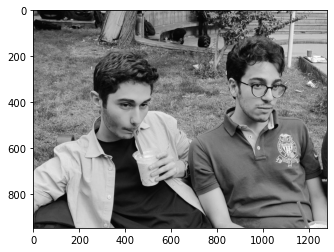

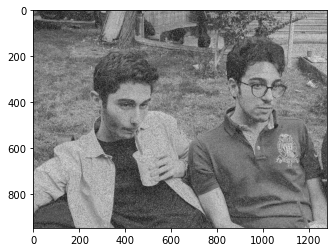

In [202]:
originalImage = Image.open("images/original.jpg").convert("L")
noisyImage = Image.open("images/noisy.jpg").convert("L")
plt.imshow(originalImage,cmap='gray')
plt.show()
plt.imshow(noisyImage,cmap='gray')
plt.show()

# 1. Image Compression
Using SVD (you can use `np.linalg.svd`) and 2D-FFT (which will be explained in details later), Compress the `original.jpg` image with compression rates of $0.1$, $0.5$, $1$, $5$ and $10$%. Then visualize the resulting compressed images of the two algorithms against one another and investigate each basis change's effectiveness in capturing more meaningful patterns of images.

The 2D Fourier transform of a data matrix can be achieved by ﬁrst applying the 1D Fourier transform to every row of the matrix, and then applying the 1D Fourier transform to every column of the intermediate matrix. This process is depicted below. `np.fft.fft2` applys a 2D Fourier transformation to the provided matrix by employing the Fast Fourier Transformation algorithm.

<img style="margin: auto;" width="45%" src="./samples/2dfft.png">

The Fourier coefficients are zero-centered by definition, and although it does not affect the result of the transformation followed by its inverse, in general, it is more convenient to have them centered around the middle point of the transformation matrix. `np.fft.fftshift` does the described shift two a provided Discrete-Fourier transformation matrix.

Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/compression.jpg">

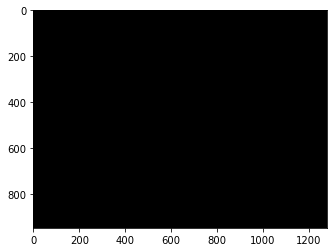

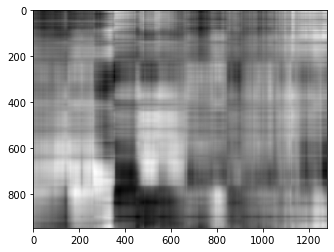

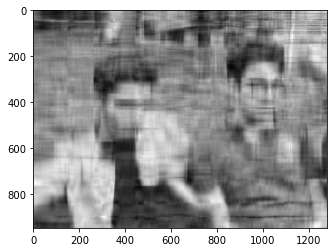

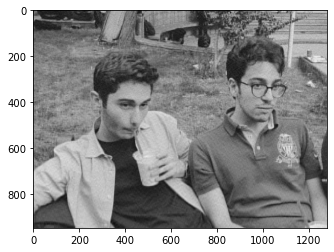

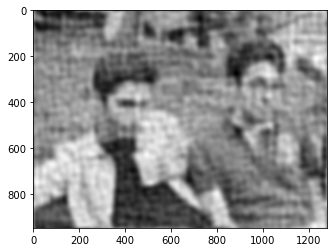

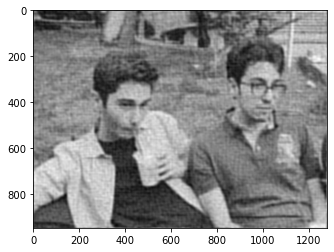

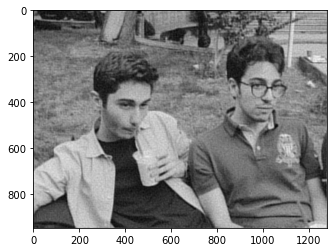

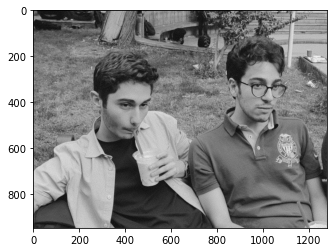

In [200]:
U, S, VT = np.linalg.svd(originalImage, full_matrices=False)
n = np.size(S,0)
S = np.diag(S)
array_svd = [int(n*0.1/100), int(n*0.5/100), int(n*1.5/100), int(n*10/100)]
for r in array_svd:
    svdImage = U[:,:r] @ S[:r,:r] @ VT[:r,:]
    plt.imshow(svdImage,cmap='gray')
    plt.show()
# qesmate fft    
fourier = np.fft.fft2(originalImage)
fourierEntries = fourier.reshape(-1)
absoluteValue_FE = np.abs(fourierEntries)
sorted_AVFE = np.sort(absoluteValue_FE)[::-1]
length = len(sorted_AVFE)
array_fft = [int(0.1 * length / 100), int(0.5 * length / 100), int(1.5 * length / 100), int(10 * length / 100)]
for r in array_fft:
    point = sorted_AVFE[r]
    check = np.abs(fourier) >= point
    compress = fourier * check
    fftImage = np.fft.ifft2(compress).real
    plt.imshow(fftImage,cmap='gray')
    plt.show()

Which change of basis seems to do better when it comes to image compression? Briefly elaborate on what makes that change of basis more suited for images?

fft behtar az svd ast, be dalile inke etelaate moheme tasvir toye bishtarin damane ha zakhire mishe va in muzu toye fft tasiresh bishtare

# 2. Image Denoising

Through the same process as the previous section and by empirically finding an optimal rank threshold for the SVD vectors, denoise the provided image. Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/svdd.jpg">

It is shown that SVD can be an effective denoising strategy when the underlying data is of low rank initially, but as observable from the example, raw SVD does not seem to be useful when it comes to denoising natural images.

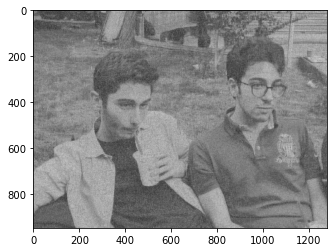

In [193]:
U, S, VT = np.linalg.svd(noisyImage, full_matrices=False)
S = np.diag(S)
r = 200
svdImage = U[:,:r] @ S[:r,:r] @ VT[:r,:]
plt.imshow(svdImage,cmap='gray')
plt.show()

The FFT is extensively used for denoising and filtering signals, as it is straightforward to isolate and manipulate particular frequency bands. It is observed that the noise is especially pronounced in high-frequency modes, therefore zero out any Fourier coefﬁcient outside of a radius containing low frequencies. You can find the approximate optimal filtering radius through trials and errors empirically. A sample denoised image is shown below:

<img style="margin: auto;" width="50%" src="./samples/fftd.jpg">

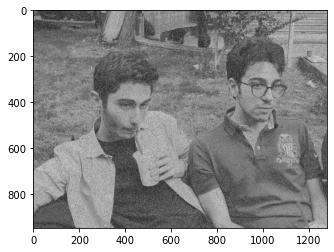

In [201]:
fourier = np.fft.fft2(noisyImage)
fImage = np.fft.fftshift(fourier)
n = np.size(fImage,1)
m = np.size(fImage,0)
r = 300
lowFilter = np.zeros((m,n))
x_center = int(n / 2)
y_center = int(m / 2)
for i in range(m):
    for j in range(n):
        if (i - y_center)**2 +(j - x_center)**2 < r**2:
            lowFilter[i,j] = 1
fImage = fImage * lowFilter
fImage = np.fft.ifft2(np.fft.ifftshift(fImage)).real
plt.imshow(fImage,cmap='gray')
plt.show()